In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle


In [2]:
data = pd.read_csv('coord_full.csv')

In [3]:
pos = pd.read_csv('nodes_data.csv')


In [4]:
G = nx.from_pandas_edgelist(data, source = "JointI", target = "JointJ", create_using=nx.Graph, edge_attr = True)

In [5]:
positions = {}
for n in G:
    row = pos[pos["node"] == n ] /1000
    positions[n]= (float(row['x']),float(row['y']))
    
nx.set_node_attributes(G,positions,"pos_km")


import numpy as np
distances = {}
for n in G.edges:
    x1,y1 = G.nodes[n[0]]["pos_km"]
    x2,y2 = G.nodes[n[1]]["pos_km"]
    d = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    distances[n] = d

nx.set_edge_attributes(G,distances,"dist_km")
    

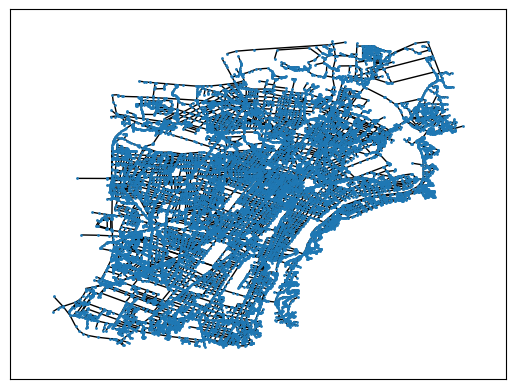

In [6]:
nx.draw_networkx(G, pos= positions, with_labels = False,node_size = 1 )

In [7]:
G.edges[(1,2)]

{'Edge': 1,
 'Length': 17.61834,
 'CoordinateX': 27263.38402,
 'CoordinateY': 5614.43249,
 'dist_km': 0.017618347264285825}

In [17]:
with open('street_network.data', 'wb') as file:
    pickle.dump(G, file)

In [18]:
from mesa import Agent, Model
import mesa.time as time
import mesa.space as space
from mesa.datacollection import DataCollector
import pickle


class MinimalAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def step(self):
        print("Hello world! I am agent: " + str(self.unique_id))


class MinimalModel(Model):
    def __init__(self):
        self.schedule = time.RandomActivation(self)
        self.grid = space.NetworkGrid(pickle.load("street_network.data"))
          
                                      

        for i in range(self.num_agents):
            a = MinimalAgent(i, self)
            self.schedule.add(a)
            location = self.grid.
            self.grid.place_agent(a, position)

        model_metrics = {
            "Number of Agents": count_agents
        }

        agent_metrics = {
            "Agent ID": "unique_id"
        }

        self.datacollector = DataCollector(model_reporters=model_metrics, agent_reporters=agent_metrics)

        self.running = True
        self.datacollector.collect(self)

    def step(self):
        print("This is step: " + str(self.schedule.steps))
        self.schedule.step()
        self.datacollector.collect(self)


def count_agents(self):
    return self.num_agents

def main():
    model = MinimalModel(height=20, width=20, num_agents=3)
    for i in range(3):
        model.step()

    # Get the Pandas Dataframe from the model, by using the table name we defined in the model
    model_data = model.datacollector.get_model_vars_dataframe()
    agent_data = model.datacollector.get_agent_vars_dataframe()
    print(model_data)
    print(agent_data)


if __name__ == '__main__':
    main()

SyntaxError: invalid syntax (1728980622.py, line 26)